Course Name: Python for Financial Analysis

EWMA Theory, this block of notes by Samario Torres

We can improve the Simple Moving Average by actually calculating the an

exponentially weighted moving average, or, EWMA.

Because a Simple Moving Average has a few weaknesses, and some of those weaknesses are things like smaller 

windows will lead to more noise rather than signal, its always going to LAG by the actual size of the window

itself, so you will have missing data at the very first point, and also its never actually going to reach the full 

peak of valley of the data due to the averaging.

Also, it does not really inform about possible future behavior, all it really does it describe trends in the data.

Also, extreme historical values can skew your Simple Moving Average significantly

EWMA: So exponentially weighted moving averages will allow us to reduce the LAG EFFECT from a simple moving 
    
and it will put more weight on the values that occured more recently, to do this is straightforward, 

you apply more weight to more recent values. 

So as the values get closer in present time, we apply more weight to them when calculating the average.

The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA model

and also on the number of periods given in a window size. Those parameters can be messed around with in pandas until

you get the desired effect. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [31]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [32]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


# SMA
## Simple Moving Average

We've already shown how to create a simple moving average, for a quick review:

In [33]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

In [34]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


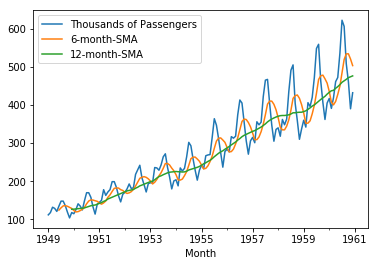

In [35]:
airline.plot()

# EWMA
## Exponentially-weighted moving average 

We just showed how to calculate the SMA based on some window.However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal.
* It will always lag by the size of the window.
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $ Notice how, as the value of 'i' approaches 't', the weight approaches the actual time and so when i = t, the weight is at its maximum.

Notice you're dividing by the sum of the weights. 




Where x_t is the input value, w_i is the applied weight (Note how it can change from i=0 to t), and y_t is the output.

Now the question is, how do we define the weight term w_i ?

This depends on the adjust parameter you provide to the .ewm() method.

When adjust is True (default), weighted averages are calculated using weights:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$ 

where  $ 0 \leq \alpha \leq 1 $


When adjust=False is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$ that first input value is equal to the first output value.

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}
So the very first data point has the smallest weight attached to it and the very most recent point has the most
weight attached to it.

The above just another way of writing $w_i$ .


When adjust=True we have y0=x0 and from the last representation above we have yt=αxt+(1−α)yt−1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have 0<α≤1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* Span, that is, s, corresponds to what is commonly called an “N-day EW moving average”. So, if you want to use an
exponentially weighted moving average, what you can do is use the span argument and set that in your mind, as an "N-day EWMA", where you just define span as that kind of period that you're thinking of, maybe a 7-day or a 14-day
exponentially weighted moving average. (Normally in terms of days).

 ---------------------------------------------------------------------------------------

* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2. It has in inverse relationship with span itself.

 --------------------------------------------------------------------------------------- 

* Half-life is the period of time for the exponential weight to reduce to one half.

 --------------------------------------------------------------------------------------- 

* Alpha specifies the smoothing factor directly.

 --------------------------------------------------------------------------------------- 
Typically when you're working with exponentially weighted moving averages, the easiest one to think about is span. The second easiest to understand is the half-life. Mathematical information attached above.

In [42]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

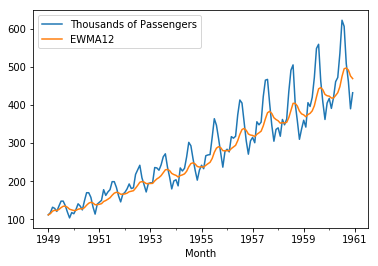

In [44]:
airline[['Thousands of Passengers','EWMA12']].plot()

#as you can see if year is more strongly weighted, you can kind of start to see that increase from the min to the max
# of each interval

Great! That is all for now, let's move on to ARIMA modeling!